In [579]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics
import pandas as pd
from scipy.stats import shapiro

### a)

In [580]:
class RandomGenerator:
    def __init__(self, x0=1):
        self.x = x0  
        self.a = 156765765
        self.c = 3097687
        self.m = 77888

    def losowa(self):
        self.x = (self.a * self.x + self.c) % self.m
        return (self.x / self.m) * 2 - 1

    def generuj(self, n):
        return [self.losowa() for _ in range(n)]



### b)

In [581]:
generator = RandomGenerator()

ciag_15 = generator.generuj(15)
ciag_120= generator.generuj(120)

# Ciągi z laboratoriów nr 2
lab2_ciag_15 = np.random.uniform(-1, 1, 15)
lab2_ciag_120 = np.random.uniform(-1, 1, 120)

### c)

In [582]:
wartości = [ "Średnia",
        "Mediana",
        "Moda",
        "Odchylenie standardowe",
        "Wariancja",
        "Skośność",
        "Kurtoza",
        "Pierwszy Kwantyl"]

def podaj_wartości_statystyczne(seq):
     
    return {
        
        "Średnia": np.mean(seq),
        "Mediana": np.median(seq),
        "Moda": statistics.mode(seq) if len(set(seq)) < len(seq) else "ND", # W przypadku tego zadania zwykle kazda wartość jest modą, bo sznasa na powtórzenie się liczb jest bardzo mała
        "Odchylenie standardowe": np.std(seq, ddof=1),
        "Wariancja": np.var(seq, ddof=1),
        "Skośność": stats.skew(seq),
        "Kurtoza": stats.kurtosis(seq),
        "Pierwszy Kwantyl": np.percentile(seq, 25)
        
    }

In [583]:
statystyki_15 = podaj_wartości_statystyczne(ciag_15)
statystyki_120 = podaj_wartości_statystyczne(ciag_120)
lab2_statystyki_15 = podaj_wartości_statystyczne(lab2_ciag_15)
lab2_statystyki_120 = podaj_wartości_statystyczne(lab2_ciag_120)

statystyki_rownomierny = {
    "Średnia": 0.0,
    "Mediana": 0.0,
    "Moda": 'ND',  
    "Odchylenie standardowe": 0.5774,
    "Wariancja": 0.3333,
    "Skośność": 0,
    "Kurtoza": 1.8,
    "Pierwszy Kwantyl": -0.5
}

In [584]:
tab = pd.DataFrame([statystyki_15,statystyki_120,lab2_statystyki_15,lab2_statystyki_120, statystyki_rownomierny],index=['ciąg 15','ciąg 120', 'Lab nr 2 ciąg 15', 'Lab nr 2 ciąg 120','rozkłąd równomierny'])
tab

,Średnia,Mediana,Moda,Odchylenie standardowe,Wariancja,Skośność,Kurtoza,Pierwszy Kwantyl
ciąg 15,0.010447,-0.045553,ND,0.697391,0.486355,0.160614,-1.607247,-0.591580
ciąg 120,0.053657,0.000026,-0.815504,0.583673,0.340675,-0.048802,-1.106294,-0.344906
Lab nr 2 ciąg 15,0.225332,0.235193,ND,0.646448,0.417895,-0.520474,-0.957885,-0.094419
Lab nr 2 ciąg 120,0.072199,0.165348,ND,0.618684,0.382770,-0.195934,-1.319227,-0.474277
rozkłąd równomierny,0.000000,0.000000,ND,0.577400,0.333300,0.000000,1.800000,-0.500000


Ciągi 15-elementowe mają większą zmienność niż ciągi 120-elementowe, co widać po wyższym odchyleniu standardowym i wariancji. Ciągi z Lab nr 2 cechują się lekko przesuniętą średnią, podczas gdy wartości dla rozkładu równomiernego są bardziej symetryczne.

### d)

In [585]:
def uniform_pdf(x, a, b):
    if a < x < b:
        return 1 / (b - a)
    else:
        return 0

a = -1 
b = 1  
x = np.linspace(a, b, 1000)
y = np.array([uniform_pdf(xi, a, b) for xi in x])


def nakreśl_wykres(sequence, title, Lab2_sequence):
    fig, (ax1,ax3,ax2) = plt.subplots(1,3, figsize = (15,5))

    ax1.set_title(f"Laboratorium nr 4")
    ax1.set_xlabel('wartość')
    ax1.set_ylabel('gęstość')
    ax1.set_ylim(0,3)
    ax1.set_xlim(-1,1)
    ax1.hist(sequence, bins=10, density=True, alpha=0.6, color='g',edgecolor='black')
    
    ax2.hist(x, bins=10, density=True, alpha=0.6, color='g',edgecolor='black')
    ax2.set_title('rozkład równomierny')
    ax2.set_xlabel('wartość')
    ax2.set_ylabel('gęstość')
    ax2.set_ylim(0,3)
    
    ax3.set_title("Laboratorium nr 2")
    ax3.set_xlabel('wartość')
    ax3.set_ylabel('gęstość')
    ax3.set_ylim(0,3)
    ax3.set_xlim(-1,1)
    ax3.hist(Lab2_sequence, bins=10, density=True, alpha=0.6, color='g',edgecolor='black')
    plt.show()

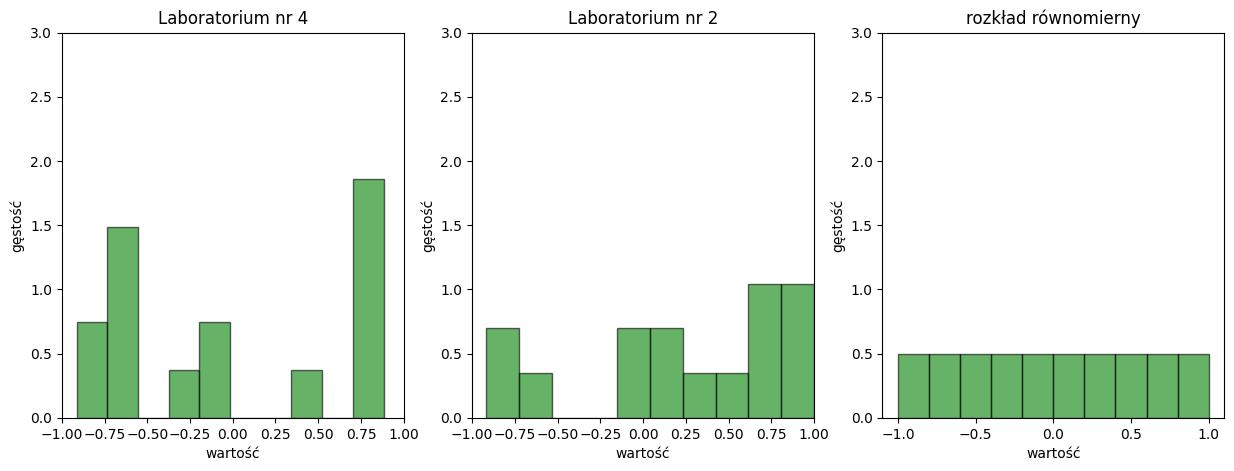

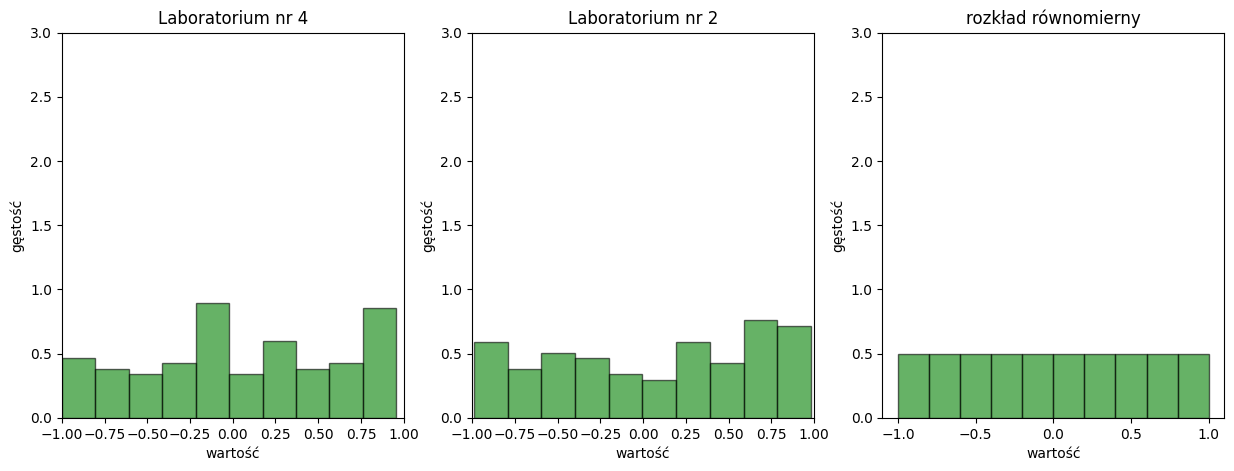

In [586]:
nakreśl_wykres(ciag_15, "Sequence of 15",lab2_ciag_15)
nakreśl_wykres(ciag_120, "Sequence of 120",lab2_ciag_120)

Wykresy dla większej próby (120) są w soim kształcie znacznie bliższe rozkładowi równomiernemu. W szcególności mniejsza próba (15) z laboratorium nr 4 odbiega od referencji poprzez rozrzucenie wartości na krańcach wykresu. Co ciekawe względna symetria jaką posiada ten wykres może doprowadzać do otrzymania przez nas wartości średniej, odchylenia standardowego itp. które wskazują na to, że rozkłąd jest równomierny.

### e)

Pierwszym krokiem jaki wykonamy jest sprawdzenie czy próby są rozkładami normalnymi.

> H0: Próba ma rozkład normalny

> HA: Próba nie ma rozkładu normalnego

Użyjemy do tego testu Shapiro-Wilka, ponieważ próba spełania warunki:
- losowości próby
- wielkość próby poniżej 2000

In [587]:
print(shapiro(ciag_15))
print(shapiro(ciag_120))
print(shapiro(x))

ShapiroResult(statistic=0.8544211387634277, pvalue=0.0200701542198658)
ShapiroResult(statistic=0.9503128528594971, pvalue=0.00022780682775191963)
ShapiroResult(statistic=0.954807698726654, pvalue=5.385439779982027e-17)


Ciąg 15:
>Statystyka Shapiro-Wilka: 0.854

>Wartość p: 0.020

>Interpretacja: Wartość p jest mniejsza od typowego poziomu istotności 0.05, co oznacza, że  mamy podstawy do odrzucenia hipotezy zerowej. Rozkład nie jest normalny.



Ciąg 120:
>Statystyka Shapiro-Wilka: 0.950

>Wartość p: 0.0002

>Interpretacja: Wartość p dla ciągu 120 elementów jest mniejsza od 0.05, co oznacza istnienie podstaw do odrzucenia hipotezy zerowej. Przyjmujemy hipotezę alternatywną. Rozkaład próby nie jest rozkładem normalnym.

Wymagania testu t-studenta:
- używany do porównymania dwóch prób w rozkłądnie normalnym
- wykorzystywany zarówno do duzych jak małych prób
- losowość prób
- niezalezność prób

Obie próby są rozkładami równomienymi, ale łatwo zauwazyć, ze zgodnie z centralnym twierdzeniem granicznym ich średnie zbiegają do rozkłądu normalnego. Z tego powodu uzyjemy testu t-studenta.

Tezy:
> H0: Średnie z prób są równe 0. 

> HA: Średnie z prób nie są równe 0.

alfa = 5%


In [588]:
def t_test(sequence, expected_mean=0):
    sample_mean = np.mean(sequence)
    sample_std = np.std(sequence, ddof=1)
    n = len(sequence)
    
    
    t_stat = (sample_mean - expected_mean) / (sample_std / np.sqrt(n))
    p_value = 2 * stats.t.sf(np.abs(t_stat), n-1)
    
    return t_stat,p_value

t_stat_15, p_value_15 = t_test(ciag_15)
t_stat_120, p_value_120 = t_test(ciag_120)

In [589]:
print(f"dla próby 15:\nstatystyka t: {t_stat_15:.3f}\nwartość p: {p_value_15:.3f}\n")
print(f"dla próby 120:\nstatystyka t: {t_stat_120:.3f}\nwartość p: {p_value_120:.3f}")

dla próby 15:
statystyka t: 0.058
wartość p: 0.955

dla próby 120:
statystyka t: 1.007
wartość p: 0.316


Wartość krytyczna dla alfa = 5%, df = 14: 2,1448

Wartość krytyczna dla alfa = 5%, df = 119: 1,9801

In [590]:
v_15 = 2.1448
v_120 = 1.9801
alfa = 0.05

def decision(tp,v,n):
    t,p = tp
    if abs(t) < abs(v) and p > alfa:
        return f'Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby {n} jest równa 0'
    else:
        return f'Odrzucamy hipotezę zerową. Zatem przyjmujemy hipotezę alternatywną. Średnia z próby {n} nie jest równa 0'

In [591]:
print(decision((t_stat_15,p_value_15),v_15,15))
print(decision((t_stat_120,p_value_120),v_120,120))

Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby 15 jest równa 0
Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby 120 jest równa 0


Sprawdzenie czy średnieodpowiednich prób uzyskanych w zad. b) tej listy oraz zad. a) Listy 2 są równe.

> H0: Średnie prób uzyskanych w zad. b) tej listy oraz zad. a) Listy 2 są równe.

> HA: Średni prób uzyskanych w zad. b) tej listy oraz zad. a) Listy 2 nie są równe.

Użyjemy do tego testu t-studenta dla dwóch niezależnych prób.

Wymagania:
- próby muszą miec rozkład normalny 
- próby muszą być równoliczne
- muszą mieć stwierdzone czy ich wariancje są równe

W naszym przypadku wariancje są równe.
Obie próby są rozkładami równomiernego, ale zgodnie z centralnym twierdzeniem granicznym ich średnie zbiegają do rozkładu normalnego. Z tego powodu możemy użyć testu t-studena



In [592]:
def porownaj_srednie(proba1, proba2):
    

    mean1, mean2 = sum(proba1) / len(proba1), sum(proba2) / len(proba2)
    var1, var2 = sum((x - mean1) ** 2 for x in proba1) / (len(proba1) - 1), sum((x - mean2) ** 2 for x in proba2) / (len(proba2) - 1)
    pooled_var = ((len(proba1) - 1) * var1 + (len(proba2) - 1) * var2) / (len(proba1) + len(proba2) - 2)
    
    
    t_stat = (mean1 - mean2) / ((pooled_var * (1 / len(proba1) + 1 / len(proba2)))**(1/2))
    
    
    df = len(proba1) + len(proba2) - 2
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

    return t_stat, p_value

In [593]:
t_stat_15, p_value_15 = porownaj_srednie(ciag_15,lab2_ciag_15)
t_stat_120, p_value_120 = porownaj_srednie(ciag_120,lab2_ciag_120)

print(porownaj_srednie(ciag_15,lab2_ciag_15))
print(porownaj_srednie(ciag_120,lab2_ciag_120))

(-0.8751981512830256, 0.3889121242613265)
(-0.2387941744575205, 0.8114706772250646)


In [594]:
def decision(t,p,v,n):
    if abs(t) < abs(v) and p > alfa:
        return f'Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby {n} jest równa dla generatora z listy nr 2 i listy nr 4'
    else:
        return f'Odrzucamy hipotezę zerową. Zatem przyjmujemy hipotezę alternatywną. Średnia z próby {n} nie jest równa dla generatora z listy nr 2 i listy nr 4'

In [595]:
print(decision(t_stat_15, p_value_15,v_15,15))
print(decision(t_stat_120, p_value_120,v_120,120))

Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby 15 jest równa dla generatora z listy nr 2 i listy nr 4
Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby 120 jest równa dla generatora z listy nr 2 i listy nr 4
